In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv("/kaggle/input/depression/student_depression_dataset.csv")
print(data.head())
df_copy = data.copy()

In [ ]:
data.info()

In [61]:
data['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [62]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [63]:
data['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

# Cleaning the Data

## Converting column 'Sleep Duration' to only numerical values.

In [64]:
## Converting column 'Sleep Duration' to only numerical values.

data['Sleep Duration'] = data['Sleep Duration'].str.strip("'").str.strip()


sleep_map = {
    "Less than 5 hours": 4,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9,
    "Others": 5  # 5 beacause majorty of the values are 4 and less than that is 5.5
}

data['Sleep Duration (hours)'] = data['Sleep Duration'].map(sleep_map)



In [65]:
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [66]:
data['Sleep Duration (hours)'].unique()
# Done

array([5.5, 4. , 7.5, 9. , 5. ])

## Change 'Yes' and 'No' columns to 1 and 0

In [11]:
data['Family History of Mental Illness'].unique() # confirming the values in the column. 

array(['No', 'Yes'], dtype=object)

In [12]:
data['Have you ever had suicidal thoughts ?'].unique() # confirming the values column.

array(['Yes', 'No'], dtype=object)

In [13]:
yes_no_map = {"Yes":1, "No":0}

data['Suicidal Thoughts'] = data["Have you ever had suicidal thoughts ?"].map(yes_no_map)
data['Family History'] = data["Family History of Mental Illness"].map(yes_no_map)

In [14]:
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  ...  \
0            0.0  8.97                 2.0               0.0  ...   
1            0.0  5.90                 5.0               0.0  ...   
2            0.0  7.03                 5.0               0.0  ...   
3            0.0  5.59                 2.0               0.0  ...   
4            0.0  8.13                 3.0               0.0  ...   

  Dietary Habits   Degree Have you ever had suicidal thoughts ?  \
0        Healthy  B.Pharm                                   Yes   
1       Moderate      BSc                 

## Exploring and cleaning "Dietary Habits column"

In [15]:
data['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [16]:
data['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

In [17]:
diet_map = {
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2,
    'Others': 0  # 0 because Majority of the sudents had unhealthy habits
}

data['Dietary Score'] = data['Dietary Habits'].map(diet_map)


In [18]:
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  ...   Degree  \
0            0.0  8.97                 2.0               0.0  ...  B.Pharm   
1            0.0  5.90                 5.0               0.0  ...      BSc   
2            0.0  7.03                 5.0               0.0  ...       BA   
3            0.0  5.59                 2.0               0.0  ...      BCA   
4            0.0  8.13                 3.0               0.0  ...   M.Tech   

  Have you ever had suicidal thoughts ? Work/Study Hours Financial Stress  \
0                                   Yes      

### Done cleaning.

# Exploring the Data

In [19]:




# # ✅ Optional, but improves Seaborn plot styling
# sns.set(style="whitegrid")


## Q1) Distribution of Depression Cases

In [20]:
print(data['Depression'].unique())
print(data['Depression'].value_counts())
print(data['Depression'].dtype)


[1 0]
Depression
1    16336
0    11565
Name: count, dtype: int64
int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


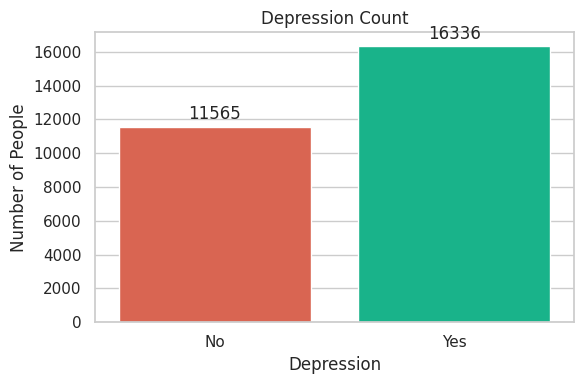

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Prepare data
depression_counts = data['Depression'].value_counts().sort_index()
depression_labels = ['No', 'Yes']

# Convert depression_counts to a pandas Series (if not already)
depression_counts = pd.Series(depression_counts)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=depression_labels, y=depression_counts.values, palette=["#EF553B", "#00CC96"])

# Add labels
plt.title("Depression Count")
plt.xlabel("Depression")
plt.ylabel("Number of People")
for i, count in enumerate(depression_counts.values):
    plt.text(i, count + 200, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Conclusion:
We can see that 16,336 students are depressed out of 27901 students. which means 58.54% Student are depressed out of 100%. This is very shocking as majority of the students are depressed in India which is the direct reflection of the short-comings of the Indian education education system and environment.

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Prepare data
depression_counts = data['Depression'].value_counts().sort_index()
depression_labels = ['No', 'Yes']

# Create bar plot
fig = go.Figure(data=[
    go.Bar(
        x=depression_labels,
        y=depression_counts.values,
        marker_color=["#EF553B", "#00CC96"],
        text=depression_counts.values,
        textposition='outside'
    )
])

# Update layout
fig.update_layout(
    title="Depression Count",
    xaxis_title="Depression",
    yaxis_title="Number of People",
    yaxis=dict(tickmode='linear'),
    template='plotly_white',
    width=600,
    height=400
)

fig.show()


In [ ]:
x=(16336/27901)*100
x

## Q2) Depression by Gender

In [ ]:
import plotly.express as px

fig = px.histogram(
    data,
    x="Gender",
    color="Depression",
    barmode="group",
    title="Depression Distribution by Gender",
    labels={"Gender": "Gender", "Depression": "Depression Status"}
)
fig.show()


In [ ]:
data['Gender'].value_counts()

In [ ]:
male_perc = (9115/15547)*100
female_per = (7221/12345)*100
print(male_perc,female_per)

Conclusion: There is no noticeable gap between percentage the male and female students who are in depression. This also suggests that the male and female population are affected equally by depression.

## Q3) CGPA vs Depression

In [ ]:
import plotly.express as px

fig = px.box(data, x='Depression', y='CGPA', color='Depression',
             title='CGPA vs Depression')
fig.update_layout(xaxis_title='Depression', yaxis_title='CGPA')
fig.show()



In [ ]:
# Calculate the Pearson correlation between CGPA and Depression
correlation = data['CGPA'].corr(data['Depression'])
print(f"Pearson Correlation between CGPA and Depression: {correlation}")


Conclusion: Based on this visualization alone, there doesn't appear to be a strong correlation between CGPA and depression status in this student population. Students with depression seem to achieve similar academic performance as measured by CGPA compared to students without depression.

## Q4) Academic & Work Pressure vs Depression

In [ ]:
print(data['Academic Pressure'].unique())
print(data['Work Pressure'].unique())


In [ ]:
print(data[['Academic Pressure','Work Pressure']])

In [ ]:
# Mean Academic Pressure by depression
import plotly.express as px
import pandas as pd

# Group by Depression and calculate mean Academic Pressure
mean_academic = data.groupby('Depression')['Academic Pressure'].mean().reset_index()

fig = px.bar(
    mean_academic,
    x='Depression',
    y='Academic Pressure',
    color='Depression',
    title='Mean Academic Pressure by Depression Status',
    labels={'Depression': 'Depression (0 = No, 1 = Yes)', 'Academic Pressure': 'Mean Academic Pressure'},
    text_auto=True
)
fig.update_layout(template='plotly_white')
fig.show()


In [ ]:
# Mean Work Pressure by depression

# Group by Depression and calculate mean Work Pressure
mean_work = data.groupby('Depression')['Work Pressure'].mean().reset_index()

fig = px.bar(
    mean_work,
    x='Depression',
    y='Work Pressure',
    color='Depression',
    title='Mean Work Pressure by Depression Status',
    labels={'Depression': 'Depression (0 = No, 1 = Yes)', 'Work Pressure': 'Mean Work Pressure'}
)
fig.update_layout(template='plotly_white')
fig.show()


In [ ]:
data['Work Pressure'].unique()

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency tables
academic_ct = pd.crosstab(data['Academic Pressure'], data['Depression'])
work_ct = pd.crosstab(data['Work Pressure'], data['Depression'])

# Perform chi-square test
chi2_academic, p_academic, _, _ = chi2_contingency(academic_ct)
chi2_work, p_work, _, _ = chi2_contingency(work_ct)

print(f"Chi-square Test - Academic Pressure vs Depression: p-value = {p_academic:.4f}")
print(f"Chi-square Test - Work Pressure vs Depression: p-value = {p_work:.4f}")


Academic Pressure is a strong factor: There's a measurable difference in depression rates at different levels of academic pressure.

Work Pressure seems irrelevant here (or underreported/poorly distributed — recall it only had values 0, 2, 5).

In [ ]:
data.info()

In [ ]:
data['Job Satisfaction'].unique()

## Q5)  Is there a relationship between Work Pressure and Job Satisfaction?

In [ ]:
# Spearman correlation (better for ordinal data)
corr = data[['Work Pressure', 'Job Satisfaction']].corr(method='spearman')
print("Spearman Correlation:\n", corr)


In [ ]:
import plotly.express as px

fig = px.box(
    data,
    x='Work Pressure',
    y='Job Satisfaction',
    title='Job Satisfaction Across Different Work Pressure Levels',
    labels={'Work Pressure': 'Work Pressure', 'Job Satisfaction': 'Job Satisfaction'}
)
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Create crosstab
heatmap_data = pd.crosstab(data['Work Pressure'], data['Job Satisfaction'])

# Convert to tidy format for Plotly
heatmap_melted = heatmap_data.reset_index().melt(id_vars='Work Pressure', value_name='Count')

# Heatmap
fig = px.density_heatmap(
    heatmap_melted,
    x='Job Satisfaction',
    y='Work Pressure',
    z='Count',
    color_continuous_scale='gnbu',
    title='Heatmap of Work Pressure vs Job Satisfaction',
    labels={'Count': 'Number of People'}
)
fig.show()


We can see that there is a direct correlation between job satisfaction and work pressure which has a positive corr of 0.6

## Q6) How much dietary habbits contribute to depression

In [ ]:
data.info()

In [ ]:
data['Dietary Habits'].unique()

In [ ]:
data["Dietary Habits"].value_counts()

In [ ]:
data["Dietary Score"].value_counts()

In [ ]:
mean_depression = data.groupby('Dietary Score')['Depression'].mean().reset_index()

fig = px.bar(
    mean_depression,
    x='Dietary Score',
    y='Depression',
    title='Average Depression Rate by Dietary Habits',
    labels={'Depression': 'Average Depression Rate', 'Dietary Score': 'Diet Quality (0=Unhealthy, 2=Healthy)'}
)
fig.show()


In [ ]:
mean_depression

This tells us that 70% of students who have unhealthy dietary habbits have depression. 
56% of students with moderate dietary habbits have depression.
This shows that the dietary habbits affect the lifestyle of the students and also is an important factor contributing to their depression

In [ ]:
# Stastical Test: Chi-Square Test

import scipy.stats as stats
import pandas as pd

# create contingency_table
conti_table = pd.crosstab(data["Dietary Score"], data['Depression'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(conti_table)

print("Chi-square Test Results:")
print(f"Chi2 statistic = {chi2:.4f}")
print(f"p-value = {p:.4f}")

since p-value is 0.000 < 0.05 


In [ ]:
import numpy as np

n = conti_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(conti_table.shape)-1)))
print(f"Cramér’s V = {cramer_v:.4f}")


# Q7) Does sleep duration of students affect depression?

In [ ]:
data.info()

In [ ]:
data['Sleep Duration (hours)'].unique()

In [ ]:
mean_dep_sleep = data.groupby("Sleep Duration (hours)")['Depression'].mean().reset_index()

fig = px.bar(
    mean_dep_sleep,
    x="Sleep Duration (hours)",
    y="Depression",
    title='Average Depression Rate by Sleep Duration',
    labels={'Depression': 'Average Depression Rate', 'Sleep Duration': 'Sleep Duration (4 hours-9 hours)'}
)
fig.show()


In [ ]:
mean_dep_sleep

In [ ]:
# Stastical Test: Chi-Square Test

import scipy.stats as stats
import pandas as pd

# create contingency_table
contin_table = pd.crosstab(data["Sleep Duration (hours)"], data['Depression'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contin_table)

print("Chi-square Test Results:")
print(f"Chi2 statistic = {chi2:.4f}")
print(f"p-value = {p:.4f}")

In [ ]:
import numpy as np
import scipy.stats as stats

# Contingency table
contingency_table = pd.crosstab(data['Sleep Duration (hours)'], data['Depression'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Cramér’s V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér’s V = {cramers_v:.4f}")


we can see that 64% of depressed students are having sleep less than 4 hours but on ther other hand 60% of the students who are having an 7-8 hour of sleep are also depressed. Thus we can safely say that only sleep does not affect depression of students. 

# Distribution of cities and depression

In [ ]:
data.info()

In [ ]:
data['City'].unique()

In [ ]:
data[data["City"]=="'Less than 5 Kalyan'"]

In [ ]:
city_dep = pd.crosstab(data['City'], data['Depression'])
city_dep['Depression rate'] = city_dep[]

In [ ]:
import pandas as pd
import plotly.express as px

# Filter only depressed individuals
depressed_by_city = data[data['Depression'] == 1]['City'].value_counts().reset_index()
depressed_by_city.columns = ['City', 'Count']

# Plot
fig = px.bar(depressed_by_city.sort_values("Count", ascending=False),
             x='City', y='Count', 
             title='Number of Depressed Individuals by City',
             text='Count')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
# Group by city and compute mean of Depression column (1=depressed, 0=not)
city_depression_rate = data.groupby('City')['Depression'].mean().reset_index()
city_depression_rate.columns = ['City', 'Depression Rate']

# Plot
fig = px.bar(city_depression_rate.sort_values("Depression Rate", ascending=False),
             x='City', y='Depression Rate',
             title='Depression Rate by City',
             text='Depression Rate')
fig.update_layout(xaxis_tickangle=-45, yaxis=dict(tickformat=".0%"))
fig.show()


In [ ]:
data['City'].value_counts()

# Q8) How many depressed students get suicidal thoughts?

In [ ]:
suicidal_thoughts = data.groupby("Depression")["Suicidal Thoughts"].mean().reset_index()
suicidal_thoughts.columns = ['Depression','Suicidal Thoughts' ]
suicidal_thoughts

In [ ]:
import plotly.express as px

fig = px.bar(
    suicidal_thoughts,
    x="Depression",
    y="Suicidal Thoughts",
    title = "Depression vs Suicidal Thoughts"
)
fig.show()

We can see that 85% Percent students who have depression are having Suicidal Thoughts. This is very alarming.

# Preparing for the Model

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [74]:
# Clean the data

Mdata = data.copy()

In [75]:
Mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [76]:
Mdata.drop(columns=['id','Sleep Duration', 'Have you ever had suicidal thoughts ?', 'Family History',"Dietary Score"], axis=1, inplace=True)
Mdata.info()

KeyError: "['Family History', 'Dietary Score'] not found in axis"

In [ ]:
# categorical_cols = ['Gender', "City", "Profession", "Degree", "Financial Stress", "Family History of Mental Illness", "Dietary Habits"]
# Mdata = pd.get_dummies(Mdata, columns=categorical_cols, drop_first=True)
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pickle

# Define your categorical columns
categorical_cols = ['Gender', "City", "Profession", "Degree", 
                    "Financial Stress", "Family History of Mental Illness", "Dietary Habits"]

# Define your numerical columns (based on previous info)
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                  'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                  'Sleep Duration (hours)']

# 1. Fit the encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(Mdata[categorical_cols])

# 2. Save the encoder
with open("ohe.pkl", "wb") as f:
    pickle.dump(ohe, f)

# 3. Transform categorical columns
encoded_cats = ohe.transform(Mdata[categorical_cols])  # ndarray

# 4. Convert to DataFrame with column names
encoded_df = pd.DataFrame(encoded_cats, columns=ohe.get_feature_names_out(categorical_cols))

# 5. Combine with numerical columns
final_df = pd.concat([Mdata[numerical_cols].reset_index(drop=True), encoded_df], axis=1)

# 6. Now you can use `final_df` to train your model


In [ ]:
final_df.info()

In [ ]:
print(final_df.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X = final_df
y = Mdata['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
# doing cross validation

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='f1')  # or 'accuracy'
print("Average F1 Score:", scores.mean())


In [ ]:
print(Mdata['Depression'].value_counts(normalize=True))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = clf_model.feature_importances_
feat_names = X.columns
imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': feat_importance})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df.head(20))
plt.title("Top 20 Feature Importances")


In [ ]:
# Training Model with Reduced and Most Influential Features

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# ✅ Top features (from your plot)
top_features = [
    'Academic Pressure', 'Age', 'CGPA', 'Work/Study Hours',
    'Study Satisfaction', 'Financial Stress_5.0', 'Sleep Duration (hours)',
    'Dietary Habits_Unhealthy','Financial Stress_2.0', 'Dietary Habits_Healthy', 'Financial Stress_4.0', 'Gender_Female' ,
    'Gender_Male', 'Family History of Mental Illness_No',
    'Family History of Mental Illness_Yes', 'Financial Stress_3.0', 'Dietary Habits_Moderate', 'City_Kalyan'
]

# Subset your data
X_top = final_df[top_features]
y = Mdata['Depression']  # or your target column

# Split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Set up Stratified KFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Evaluate each model using cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=make_scorer(accuracy_score))
    print(f"{model_name} - Accuracy: {scores.mean()} ± {scores.std()}")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l2'],        # l1 can be tried with solver='liblinear'
    'solver': ['lbfgs']       # Use 'liblinear' for small datasets or l1
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
# Fine tuning other models together (SVM, XGBoost, RandomForest)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def tune_svm(X_train, y_train):
    svm_params = {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    }
    svm_grid = GridSearchCV(
        SVC(random_state=42),
        svm_params,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy',
        n_jobs=-1
    )
    svm_grid.fit(X_train, y_train)
    return svm_grid


def tune_random_forest(X_train, y_train):
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }
    rf_grid = GridSearchCV(
        RandomForestClassifier(random_state=42),
        rf_params,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy',
        n_jobs=-1
    )
    rf_grid.fit(X_train, y_train)
    return rf_grid


def tune_xgboost(X_train, y_train):
    xgb_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
    xgb_grid = RandomizedSearchCV(
        XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        xgb_params,
        n_iter=20,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    xgb_grid.fit(X_train, y_train)
    return xgb_grid

# Run tuning
svm_result = tune_svm(X_train, y_train)
rf_result = tune_random_forest(X_train, y_train)
xgb_result = tune_xgboost(X_train, y_train)

# Collect best models
models = {
    'SVM': svm_result,
    'Random Forest': rf_result,
    'XGBoost': xgb_result
}

# Print results
for name, result in models.items():
    print(f"\n🔍 {name}")
    print("Best Params:", result.best_params_)
    print("Best CV Accuracy:", result.best_score_)


In [ ]:
# Evaluate on test set
for name, result in models.items():
    best_model = result.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"\n📈 {name} Test Set Evaluation")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    # cm = confusion_matrix(y_test, y_pred)
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title(f'{name} - Confusion Matrix')
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.show()


In [ ]:
## Training XGBoost on Full Features

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Features and target
X_full = final_df
y = Mdata['Depression']

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Final model
final_xgb = XGBClassifier(
    subsample=1.0,
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train
final_xgb.fit(X_train_full, y_train_full)

# Predict
y_pred_full = final_xgb.predict(X_test_full)

# Evaluation
print("📊 Classification Report (Full Features XGBoost):")
print(classification_report(y_test_full, y_pred_full))

print(f"✅ Accuracy: {accuracy_score(y_test_full, y_pred_full):.4f}")

In [ ]:
from xgboost import XGBClassifier
import joblib

# Final model with best params
final_xgb = XGBClassifier(
    subsample=1.0,
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train on the full training data
final_xgb.fit(X_train, y_train)
y_pred = final_xgb.predict(X_test)
print(classification_report(y_test, y_pred))
#### Save the model
joblib.dump(final_xgb, 'final2_xgb_depression_model.pkl')
print("✅ Final XGBoost model trained and saved!")


In [ ]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(
    estimators=[
        ('xgb', final_xgb),
        ('svc', SVC(C=1, kernel='rbf', gamma='scale', probability=True)),
        ('lr', LogisticRegression(max_iter=1000))
    ],
    final_estimator=LogisticRegression()
)

stack.fit(X_train, y_train)
print("🔁 Stacking model accuracy:", stack.score(X_test, y_test))


In [ ]:
Mdata['Study Satisfaction'].unique()

In [ ]:
data['Financial Stress'].unique()

In [ ]:
data['Dietary Habits'].unique()

In [ ]:
data['Academic Pressure'].unique()

In [ ]:
Mdata.info()

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, recall_score
# from mlxtend.classifier import StackingClassifier

# # Base models
# clf1 = LogisticRegression(max_iter=1000, random_state=42)
# clf2 = RandomForestClassifier(n_estimators=200, random_state=42)
# clf3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# # Optional slow model
# # clf4 = SVC(probability=True, random_state=42)

# # Meta-model
# meta_clf = LogisticRegression(random_state=42)

# # Stacking
# stacked_model = StackingClassifier(classifiers=[clf1, clf2, clf3],
#                                    meta_classifier=meta_clf,
#                                    use_probas=True,  # meta uses probability outputs
#                                    average_probas=False)

# # Train-test split
# X = final_df[top_features]  # Or full features
# y = Mdata['Depression']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the stacking model
# stacked_model.fit(X_train, y_train)

# # Predictions
# y_pred = stacked_model.predict(X_test)

# # Evaluate
# print("📊 Classification Report (Stacked Model):")
# print(classification_report(y_test, y_pred))

# # Recall for class 1 (depressed)
# recall = recall_score(y_test, y_pred)
# print(f"✅ Recall (Depression Class): {recall:.4f}")


In [ ]:
# import numpy as np
# from sklearn.metrics import classification_report, precision_recall_curve

# # Get predicted probabilities for the positive class
# y_probs = final_xgb.predict_proba(X_test)[:, 1]

# # Try multiple thresholds
# thresholds = np.arange(0.1, 0.9, 0.05)
# for thresh in thresholds:
#     y_pred_thresh = (y_probs >= thresh).astype(int)
#     report = classification_report(y_test, y_pred_thresh, output_dict=True)
#     recall_class_1 = report['1']['recall']
#     precision_class_1 = report['1']['precision']
#     accuracy = report['accuracy']
#     print(f"Threshold: {thresh:.2f} | Recall (1): {recall_class_1:.4f} | Precision (1): {precision_class_1:.4f} | Accuracy: {accuracy:.4f}")


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
# import numpy as np

# # Initialize models with best hyperparameters
# xgb_model = XGBClassifier(
#     subsample=1.0,
#     n_estimators=200,
#     max_depth=3,
#     learning_rate=0.1,
#     colsample_bytree=0.8,
#     use_label_encoder=False,
#     eval_metric='logloss',
#     random_state=42
# )

# svm_model = SVC(kernel='linear', C=10, probability=True, random_state=42)
# logreg_model = LogisticRegression(max_iter=1000, random_state=42)
# rf_model = RandomForestClassifier(
#     n_estimators=200,
#     max_depth=None,
#     max_features='sqrt',
#     min_samples_split=2,
#     min_samples_leaf=2,
#     random_state=42
# )

# # Fit models
# xgb_model.fit(X_train, y_train)
# svm_model.fit(X_train, y_train)
# logreg_model.fit(X_train, y_train)
# rf_model.fit(X_train, y_train)

# # Predict probabilities
# xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
# svm_probs = svm_model.predict_proba(X_test)[:, 1]
# logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
# rf_probs = rf_model.predict_proba(X_test)[:, 1]

# # Soft voting (average of probabilities)
# ensemble_probs = (xgb_probs + svm_probs + logreg_probs + rf_probs) / 4

# # Try multiple thresholds to evaluate performance
# thresholds = np.arange(0.1, 0.9, 0.05)
# for t in thresholds:
#     y_pred_thresh = (ensemble_probs >= t).astype(int)
#     recall = recall_score(y_test, y_pred_thresh)
#     precision = precision_score(y_test, y_pred_thresh)
#     accuracy = accuracy_score(y_test, y_pred_thresh)
#     print(f"Threshold: {t:.2f} | Recall (1): {recall:.4f} | Precision (1): {precision:.4f} | Accuracy: {accuracy:.4f}")
